In [1]:
# THIS IS USED TO ANALYSE THE OUTPUT FROM ROCKSTAR
# TRANSLATED FROM IDL CODES OF HAO

In [2]:
%matplotlib inline
import numpy as np
import astropy.io.fits as fits
import csv
import matplotlib.pyplot as plt
from matplotlib import cm
import math as m
import PyAstronomy as PA
import galpy.util.bovy_coords as gub

In [3]:
# parameters
dpath = "/Users/htian/Documents/work/data/RockData/"
# fn_in = "rockin_Aq_A_8_0_0_4.dat"
# fn_out = "output_rockin_Aq_A_8_0_0_4_rock_10_1_1.txt"
fn_in = "rock_input.dat"
fn_out = "output_rock_input_rock_100_1_1.txt"
nptc = 100001 # partical number in each prg
nprg = 33     # number of progenitors

In [4]:
# load input data
data_in = np.loadtxt(dpath+fn_in)
x_in,y_in,z_in = data_in[:,0]*1000/0.7,data_in[:,1]*1000/0.7,data_in[:,2]*1000/0.7
u_in,v_in,w_in = data_in[:,3],data_in[:,4],data_in[:,5]
Lx = y_in * w_in - z_in * v_in
Ly = z_in * u_in - x_in * w_in
Lz = x_in * v_in - y_in * u_in
Lxy = np.sqrt(Lx**2+Ly**2)




partid = data_in[:,6]                           # particle ID in the full dataset
prgid = (partid-partid%nptc)/nptc               # progenitor IDs of each particle
np_in = len(x_in)
# plt.scatter(u_in,v_in,s=1,c=(prgid*47)%255,alpha=1)
# plt.plot(u_in,v_in,'k.',alpha=0.5,markersize=5)
# plt.show()
#  load output data 
pstt, psed, lvl, opid = np.loadtxt(dpath+fn_out,\
        dtype={'names':('pstt','psed','lvl','opid'),\
        'formats':(int,int,int,int)},unpack=True,\
                                  usecols=(0,1,3,4))
# pstt, psed, lvl, opid = data_op[:,0],data_op[:,1], data_op[:,3],data_op[:,4]
max_lvl = int(np.max(lvl))
print('A hierarchical tree with {max_lvl} levels was built by ROCKSTAR.'.format(**locals()))
rcd_lvl = np.zeros((np_in,max_lvl+1))-1
for ilvl in range(0,max_lvl+1):
    ind = lvl == ilvl
    rcd_lvl[opid[ind],ilvl] = pstt[ind]
np.savetxt(dpath+'rcd_lvl.txt',rcd_lvl)

# rcd_lvl = np.load
tag_part = np.zeros((np_in,max_lvl+1))-1
trcd0 = rcd_lvl[:,0]
u_trcd = np.unique(trcd0)
tid = 0
for i in range(0,len(u_trcd)):
    indt = trcd0==u_trcd[i]
    tag_part[indt,0] = tid
    tid = tid+1
for i in range(1,max_lvl+1):
    print(i)
    tid = 0
    for j in range(0,i):
        trcd1 = rcd_lvl[:,j]
        if j < i-1 :
            trcd2 = rcd_lvl[:,j+1]
            ind_lvl = (trcd1 >= 0) & (trcd2==-1)
            if len(trcd1[ind_lvl])>0 :
                tlvl = trcd1[ind_lvl]
                u_tlvl = np.unique(tlvl)
                for k in range(0,len(u_tlvl)):
                    ind = (trcd1==u_tlvl[k]) & (trcd2==-1)
                    tag_part[ind,i] = tid
                    tid = tid + 1
        else:
            ind_lvl = trcd1 >= 0
            tlvl = trcd1[ind_lvl]
            u_tlvl = np.unique(tlvl)
            for k in range(0,len(u_tlvl)):
                ind = (trcd1==u_tlvl[k])
                tag_part[ind,i] = tid
                tid = tid+1
np.savetxt(dpath+"tag_part.dat",tag_part)

A hierarchical tree with 10 levels was built by ROCKSTAR.
1
2
3
4
5
6
7
8
9
10


2 71


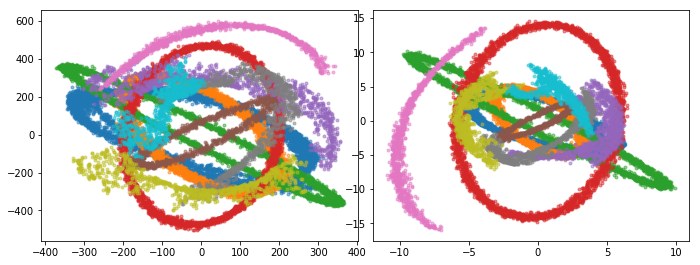

In [20]:
# plot results
for plot_lvl in range(2,3):
# plot_lvl = 2
    rlvl = tag_part[:,plot_lvl]
    # rlvl = rcd_lvl[:,plot_lvl]
    sid = np.unique(rlvl)
    ns = len(sid)
    nmb_s = np.zeros(ns)
    for i in range(0,ns):
        nmb_s[i] = len(rlvl[rlvl==sid[i]])
    sind = np.argsort(nmb_s)[::-1]
    ssid = sid[sind]
    snmb = nmb_s[sind]
    print(plot_lvl,ns)

    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_axes([0.05,0.1,0.44,0.8])
    ax2 = fig.add_axes([0.51,0.1,0.44,0.8])
    for i in range(20,30):#ns-1):
        ind = rlvl==ssid[i]
        if len(rlvl[ind])<10000000:
            ax1.plot(u_in[ind],v_in[ind],'o',markersize=3,alpha=0.5)
            ax2.plot(x_in[ind],y_in[ind],'o',markersize=3,alpha=0.5)
#             ax1.axis([-400,400,-400,400])
#             ax2.axis([-2000,2000,0,2000])
#             plt.show()
#             plt.close(all)
#             del fig

In [21]:
print(len(snmb[snmb>100]))

70
